#  Deployment of Zomato Restaurant Ratings



Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is.

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from geopy.geocoders import Nominatim  
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS
import re
import warnings
from warnings import filterwarnings
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split


In [2]:
#Reading the dataset

import pandas as pd

df = pd.read_csv('zomato.csv')

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
## Checking if dataset contains any null
#code of list comprehension
#iterate on each and evey feature(columns) and store it into a list of feature ................
#where the sum of the null values in the column is greater than 1

# nan_values = df.isna()
# nan_columns = nan_values.any()

# columns_with_nan = df.columns[nan_columns].tolist()
# print(columns_with_nan)
feature_na=[]
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
print(feature_na)

['rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)']


In [5]:
#missing % of values for each feature
""""
format()= This method of the built-in string class provides functionality for complex variable substitutions and value formatting.
This new formatting technique is regarded as more elegant.
syntax =string.format(var1, var2,…)
"""
#df['rate'].isnull().sum()/len(df)*100                (divide the number of missing values by number of total values)X100
for feature in feature_na:
    print('{} has {}% missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4) ))


rate has 15.0337% missing values
phone has 2.3358% missing values
location has 0.0406% missing values
rest_type has 0.4389% missing values
dish_liked has 54.2916% missing values
cuisines has 0.087% missing values
approx_cost(for two people) has 0.669% missing values


In [6]:
df.isna()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Checking null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.shape


(51717, 17)

In [10]:
#convert data type from object into int or float
df['approx_cost(for two people)'].dtype

dtype('O')

In [11]:
df['approx_cost(for two people)'].isnull()                 #filter to check true=null values in approx_cost(for two people)


0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: approx_cost(for two people), Length: 51717, dtype: bool

In [12]:
df[df['approx_cost(for two people)'].isnull()]              #apply filter to get all the null value rows


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,NaN,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


In [13]:
df['approx_cost(for two people)'].unique()                             #get the list of all unique values to find out what


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))
#update the values without comma
df['approx_cost(for two people)'].unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [15]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df['approx_cost(for two people)'].dtype

dtype('float64')

In [16]:
#Clear rate feature
df['rate'].dtype


dtype('O')

In [17]:
df['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
df['rate'][0].split('/')[0]


'4.1'

In [19]:
def split(x):
    return x.split('/')[0]

In [20]:
df['rate']=df['rate'].astype(str).apply(split)


In [21]:
df['rate'].unique()


array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [22]:
df['rate'].replace('-',0,inplace=True)
df['rate'].replace('NEW',0,inplace=True)

In [23]:
df['rate']=df['rate'].astype(float)


In [24]:
df['rate'].dtype


dtype('float64')

In [25]:
df['rate'].unique()


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [26]:
df.online_order.value_counts()


Yes    30444
No     21273
Name: online_order, dtype: int64

AxesSubplot(0.08,0.07;0.87x0.81)


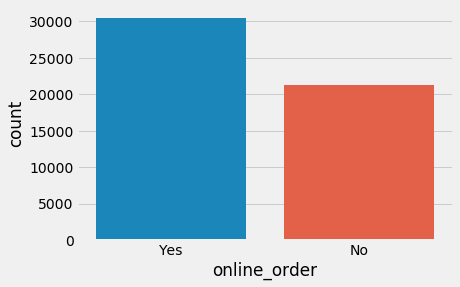

In [27]:
print(sns.countplot(x=df['online_order']))


In [28]:
df.book_table.value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

AxesSubplot(0.08,0.07;0.87x0.81)


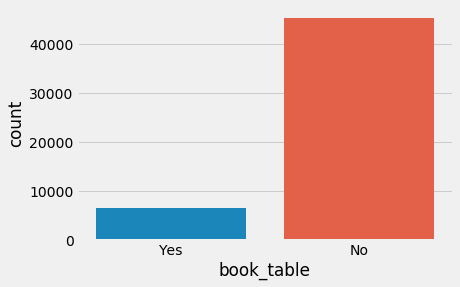

In [29]:

print(sns.countplot(x=df['book_table']))


In [30]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [31]:
df["listed_in(type)"].value_counts()


Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [32]:
df["menu_item"].value_counts()


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [33]:
df["location"].value_counts()


BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

[Text(0, 0, 'Buffet'), Text(0, 0, 'Cafes'), Text(0, 0, 'Delivery'), Text(0, 0, 'Desserts'), Text(0, 0, 'Dine-out'), Text(0, 0, 'Drinks & nightlife'), Text(0, 0, 'Pubs and bars')]


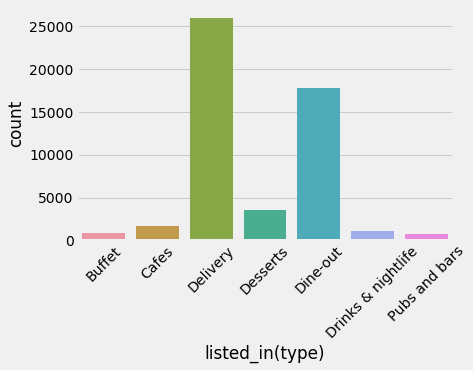

In [34]:
#data.rates.nunique()
chart=sns.countplot(x=df['listed_in(type)'])
print(chart.set_xticklabels(chart.get_xticklabels(), rotation=45))

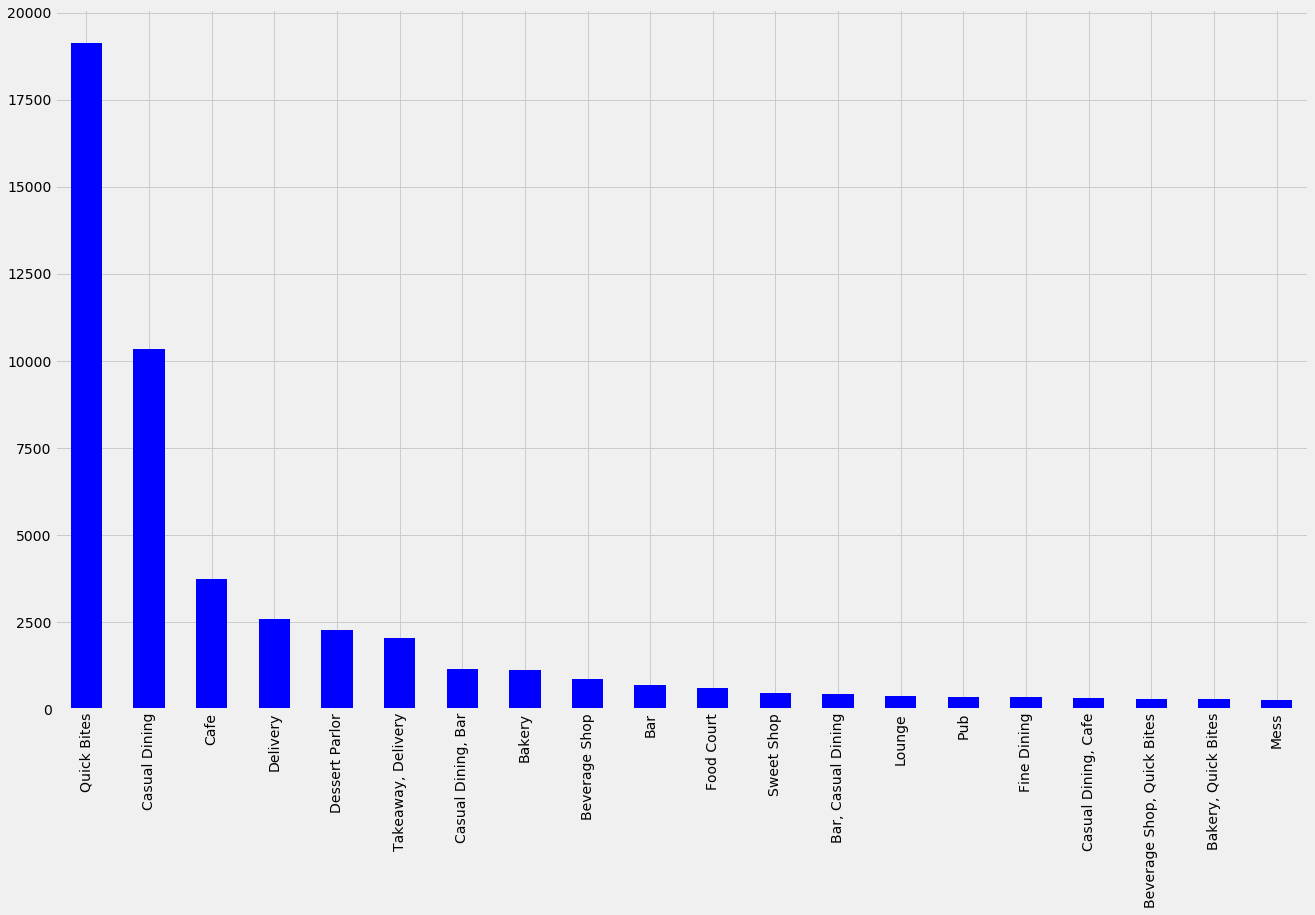

In [35]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='blue')

# Data Cleaning and Preprocessing


In [36]:
#Converting votes to numeric
df["votes"] = df["votes"].apply(pd.to_numeric)

In [37]:
df['votes']

0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51717, dtype: int64

In [38]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [39]:
df['rate']=imp_mean.fit_transform(df['rate'].array.reshape(-1, 1))

In [40]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.9
51714    3.9
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [41]:
#Converting cost to float
df=df.rename(columns={"approx_cost(for two people)":"cost" })
#df['cost'] = df['cost'].str.replace(',','').astype(float)

In [42]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [43]:
#Filling null values in cost
df['cost']=df['cost'].fillna(df['cost'].mean())

In [44]:
df['cost']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost, Length: 51717, dtype: float64

In [45]:
#Converting online_order and book_table column to Boolean type
df.online_order.replace(('Yes','No'),(1, 0),inplace=True)
df.book_table.replace(('Yes','No'),(1, 0),inplace=True)

In [46]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [47]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [48]:
#Selecting important features
df=df[["online_order","book_table","votes",
         "rest_type","cuisines","cost","rate"]]

In [49]:
df.isnull().sum()/len(df)


online_order    0.000000
book_table      0.000000
votes           0.000000
rest_type       0.004389
cuisines        0.000870
cost            0.000000
rate            0.000000
dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51717 non-null  int64  
 1   book_table    51717 non-null  int64  
 2   votes         51717 non-null  int64  
 3   rest_type     51490 non-null  object 
 4   cuisines      51672 non-null  object 
 5   cost          51717 non-null  float64
 6   rate          51717 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.8+ MB


In [51]:
df.dropna(inplace=True)

In [52]:
df.isnull().sum()/len(df)


online_order    0.0
book_table      0.0
votes           0.0
rest_type       0.0
cuisines        0.0
cost            0.0
rate            0.0
dtype: float64

In [53]:
df['cuisines'].value_counts

<bound method IndexOpsMixin.value_counts of 0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51466, dtype: object>

In [54]:
df['cost'].describe()

count    51466.000000
mean       556.039953
std        438.195201
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: cost, dtype: float64

In [55]:
df['cuisines'].value_counts().nlargest(30)

North Indian                           2899
North Indian, Chinese                  2361
South Indian                           1828
Biryani                                 909
Bakery, Desserts                        907
Fast Food                               803
Desserts                                766
Cafe                                    756
South Indian, North Indian, Chinese     726
Bakery                                  649
Chinese                                 554
Ice Cream, Desserts                     417
Chinese, North Indian                   405
Mithai, Street Food                     363
Desserts, Ice Cream                     354
North Indian, Chinese, Biryani          348
South Indian, North Indian              343
North Indian, South Indian              333
North Indian, South Indian, Chinese     305
Beverages                               297
North Indian, Biryani                   285
Biryani, Kebab                          278
Finger Food                     

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51466 entries, 0 to 51716
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51466 non-null  int64  
 1   book_table    51466 non-null  int64  
 2   votes         51466 non-null  int64  
 3   rest_type     51466 non-null  object 
 4   cuisines      51466 non-null  object 
 5   cost          51466 non-null  float64
 6   rate          51466 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.1+ MB


In [57]:
df.columns

Index(['online_order', 'book_table', 'votes', 'rest_type', 'cuisines', 'cost',
       'rate'],
      dtype='object')

In [58]:
#df['cuisines_1']= pd.np.where(df.cuisines.str.containe(''))

In [59]:
df['cuisines'] = pd.np.where(df.cuisines.str.contains("Indian","Biryani"),'Indian',
                               pd.np.where(df.cuisines.str.contains("Cafe","Pizza"),'Italian',
                               pd.np.where(df.cuisines.str.contains("Desserts","Beverages"),'Desserts',
                               pd.np.where(df.cuisines.str.contains("Chinese"),'Chinese',
                               pd.np.where(df.cuisines.str.contains("Thai"),'Thai',
                               pd.np.where(df.cuisines.str.contains("Bakery"),'Desserts',
                               pd.np.where(df.cuisines.str.contains("Food","Burger"),'fastfood',
                               pd.np.where(df.cuisines.str.contains("sea"),'seafood', 'other'))))))))

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

The pandas.np module is deprecated

In [60]:
df

,online_order,book_table,votes,rest_type,cuisines,cost,rate
0,1,1,775,Casual Dining,Indian,800.0,4.1
1,1,0,787,Casual Dining,Indian,800.0,4.1
2,1,0,918,"Cafe, Casual Dining",Italian,800.0,3.8
3,0,0,88,Quick Bites,Indian,300.0,3.7
4,0,0,166,Casual Dining,Indian,600.0,3.8
...,...,...,...,...,...,...,...
51712,0,0,27,Bar,other,1500.0,3.6
51713,0,0,0,Bar,fastfood,600.0,3.9
51714,0,0,0,Bar,fastfood,2000.0,3.9
51715,0,1,236,Bar,fastfood,2500.0,4.3


In [61]:
df['cuisines'].value_counts()

Indian      25037
other        7182
fastfood     5668
Desserts     5380
Italian      4805
Chinese      3280
Thai          114
Name: cuisines, dtype: int64

In [62]:
df['rest_type'].value_counts().nlargest(60)

Quick Bites                      19129
Casual Dining                    10326
Cafe                              3732
Delivery                          2595
Dessert Parlor                    2262
Takeaway, Delivery                2035
Casual Dining, Bar                1154
Bakery                            1141
Beverage Shop                      865
Bar                                697
Food Court                         623
Sweet Shop                         468
Bar, Casual Dining                 425
Lounge                             396
Pub                                357
Fine Dining                        346
Casual Dining, Cafe                319
Beverage Shop, Quick Bites         296
Bakery, Quick Bites                289
Mess                               267
Pub, Casual Dining                 255
Sweet Shop, Quick Bites            178
Kiosk                              176
Dessert Parlor, Cafe               175
Cafe, Casual Dining                173
Cafe, Bakery             

In [63]:
#df['rest_type']= pd.np.where(df.rest_type.str.containe('')

In [64]:
df['rest_type'] = pd.np.where(df.rest_type.str.contains("Quick Bite","Takeaway"),'Takeaway',
                               pd.np.where(df.rest_type.str.contains("Delivery","Bakery"),'Delivery',
                               pd.np.where(df.rest_type.str.contains("Dessert Parlor","Sweet Shop"),'Desserts',
                               pd.np.where(df.rest_type.str.contains("Casual Dining","Fine Dining"),'Casual Dining',
                               pd.np.where(df.rest_type.str.contains("Food Court"),'Takeaway',
                               pd.np.where(df.rest_type.str.contains("Bakery","Microbrewery"),'Desserts',
                               pd.np.where(df.rest_type.str.contains("Kiosk"),'Delivery',
                               pd.np.where(df.rest_type.str.contains("Beverage Shop","Cafe"),'Cafe',
                               pd.np.where(df.rest_type.str.contains("Bar","Lounge"),'Cafe', 'Others')))))))))

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

The pandas.np module is deprecated

In [65]:
df['rest_type'].value_counts()

Takeaway         21263
Casual Dining    13049
Others            6170
Delivery          4806
Desserts          4416
Cafe              1762
Name: rest_type, dtype: int64

In [66]:
df

,online_order,book_table,votes,rest_type,cuisines,cost,rate
0,1,1,775,Casual Dining,Indian,800.0,4.1
1,1,0,787,Casual Dining,Indian,800.0,4.1
2,1,0,918,Casual Dining,Italian,800.0,3.8
3,0,0,88,Takeaway,Indian,300.0,3.7
4,0,0,166,Casual Dining,Indian,600.0,3.8
...,...,...,...,...,...,...,...
51712,0,0,27,Cafe,other,1500.0,3.6
51713,0,0,0,Cafe,fastfood,600.0,3.9
51714,0,0,0,Cafe,fastfood,2000.0,3.9
51715,0,1,236,Cafe,fastfood,2500.0,4.3


In [67]:
df.columns

Index(['online_order', 'book_table', 'votes', 'rest_type', 'cuisines', 'cost',
       'rate'],
      dtype='object')

In [68]:
df['online_order'].sort_values(ascending=False).unique()


array([1, 0], dtype=int64)

In [69]:
df['book_table'].sort_values(ascending=False).unique()


array([1, 0], dtype=int64)

In [70]:
df['votes'].sort_values(ascending=False).unique()


array([16832, 16345, 14956, ...,     2,     1,     0], dtype=int64)

In [71]:
df['votes'].min()

0

In [72]:
df['votes'].max()

16832

In [73]:
df['votes'].describe()

count    51466.000000
mean       284.764408
std        805.597108
min          0.000000
25%          7.000000
50%         41.000000
75%        199.000000
max      16832.000000
Name: votes, dtype: float64

In [74]:
df['rest_type'].sort_values(ascending=False).unique()


array(['Takeaway', 'Others', 'Desserts', 'Delivery', 'Casual Dining',
       'Cafe'], dtype=object)

In [75]:
df['cuisines'].sort_values(ascending=False).unique()


array(['other', 'fastfood', 'Thai', 'Italian', 'Indian', 'Desserts',
       'Chinese'], dtype=object)

In [76]:
def return_(i):
    if i == 'Chinese':
        return 5
    elif i == 'fastfood':
        return 0
    elif i == 'Thai':
        return 1
    elif i == 'Italian':
        return 2
    elif i == 'Indian':
        return 3
    elif i == 'Desserts':
        return 4
    elif i== 'other':
        return 6

In [77]:
df['cuisines']= df['cuisines'].apply(lambda x: return_(x))

In [78]:
df

,online_order,book_table,votes,rest_type,cuisines,cost,rate
0,1,1,775,Casual Dining,3,800.0,4.1
1,1,0,787,Casual Dining,3,800.0,4.1
2,1,0,918,Casual Dining,2,800.0,3.8
3,0,0,88,Takeaway,3,300.0,3.7
4,0,0,166,Casual Dining,3,600.0,3.8
...,...,...,...,...,...,...,...
51712,0,0,27,Cafe,6,1500.0,3.6
51713,0,0,0,Cafe,0,600.0,3.9
51714,0,0,0,Cafe,0,2000.0,3.9
51715,0,1,236,Cafe,0,2500.0,4.3


In [79]:
def return1_(h):
    if h == 'Takeaway':
        return 0
    elif h == 'Desserts':
        return 1
    elif h == 'Delivery':
        return 2
    elif h == 'Casual Dining':
        return 3
    elif h == 'Cafe':
        return 4
    elif h == 'Others':
        return 5

In [80]:
df['rest_type']= df['rest_type'].apply(lambda x: return1_(x))

In [81]:
df

,online_order,book_table,votes,rest_type,cuisines,cost,rate
0,1,1,775,3,3,800.0,4.1
1,1,0,787,3,3,800.0,4.1
2,1,0,918,3,2,800.0,3.8
3,0,0,88,0,3,300.0,3.7
4,0,0,166,3,3,600.0,3.8
...,...,...,...,...,...,...,...
51712,0,0,27,4,6,1500.0,3.6
51713,0,0,0,4,0,600.0,3.9
51714,0,0,0,4,0,2000.0,3.9
51715,0,1,236,4,0,2500.0,4.3


In [82]:
df

,online_order,book_table,votes,rest_type,cuisines,cost,rate
0,1,1,775,3,3,800.0,4.1
1,1,0,787,3,3,800.0,4.1
2,1,0,918,3,2,800.0,3.8
3,0,0,88,0,3,300.0,3.7
4,0,0,166,3,3,600.0,3.8
...,...,...,...,...,...,...,...
51712,0,0,27,4,6,1500.0,3.6
51713,0,0,0,4,0,600.0,3.9
51714,0,0,0,4,0,2000.0,3.9
51715,0,1,236,4,0,2500.0,4.3


In [83]:
df['rest_type'].unique()

array([3, 0, 5, 2, 1, 4], dtype=int64)

In [84]:
df['cuisines'].unique()

array([3, 2, 4, 6, 5, 0, 1], dtype=int64)

In [85]:
df['cost'] = df['cost'].astype(int)


In [86]:
df

,online_order,book_table,votes,rest_type,cuisines,cost,rate
0,1,1,775,3,3,800,4.1
1,1,0,787,3,3,800,4.1
2,1,0,918,3,2,800,3.8
3,0,0,88,0,3,300,3.7
4,0,0,166,3,3,600,3.8
...,...,...,...,...,...,...,...
51712,0,0,27,4,6,1500,3.6
51713,0,0,0,4,0,600,3.9
51714,0,0,0,4,0,2000,3.9
51715,0,1,236,4,0,2500,4.3


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51466 entries, 0 to 51716
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51466 non-null  int64  
 1   book_table    51466 non-null  int64  
 2   votes         51466 non-null  int64  
 3   rest_type     51466 non-null  int64  
 4   cuisines      51466 non-null  int64  
 5   cost          51466 non-null  int32  
 6   rate          51466 non-null  float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 2.9 MB


# Defining dependent and independent variables of model


In [88]:
#Lets first create the target column and split our data for training and validation
df['target']=0 # declare a column named target



In [89]:
df

,online_order,book_table,votes,rest_type,cuisines,cost,rate,target
0,1,1,775,3,3,800,4.1,0
1,1,0,787,3,3,800,4.1,0
2,1,0,918,3,2,800,3.8,0
3,0,0,88,0,3,300,3.7,0
4,0,0,166,3,3,600,3.8,0
...,...,...,...,...,...,...,...,...
51712,0,0,27,4,6,1500,3.6,0
51713,0,0,0,4,0,600,3.9,0
51714,0,0,0,4,0,2000,3.9,0
51715,0,1,236,4,0,2500,4.3,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51466 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51466 non-null  int64  
 1   book_table    51466 non-null  int64  
 2   votes         51466 non-null  int64  
 3   rest_type     51466 non-null  int64  
 4   cuisines      51466 non-null  int64  
 5   cost          51466 non-null  int32  
 6   rate          51466 non-null  float64
 7   target        51466 non-null  int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 3.3 MB


In [91]:
df['target'][df['rate']>=3.75]=1; # target is equal to 1 if the corresponding rate is >= 3.75
df['target'][df['rate']<3.75]=0; # target is equal to 0 if the corresponding rate is < 3.75
y=df['target']
df.drop(['target','rate'],axis=1,inplace=True)


C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
y

0        1
1        1
2        1
3        0
4        1
        ..
51712    0
51713    1
51714    1
51715    1
51716    0
Name: target, Length: 51466, dtype: int64

In [93]:
X=df
X

,online_order,book_table,votes,rest_type,cuisines,cost
0,1,1,775,3,3,800
1,1,0,787,3,3,800
2,1,0,918,3,2,800
3,0,0,88,0,3,300
4,0,0,166,3,3,600
...,...,...,...,...,...,...
51712,0,0,27,4,6,1500
51713,0,0,0,4,0,600
51714,0,0,0,4,0,2000
51715,0,1,236,4,0,2500


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn import metrics


In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=77) # I set the seed manually for reproducible results when testing

In [96]:
def metricss(y_test,y_pred):
    acc=metrics.accuracy_score(y_test, y_pred)*100
    precision=metrics.precision_score(y_test, y_pred)*100
    recall=metrics.recall_score(y_test, y_pred)*100
    return acc,precision,recall

In [97]:
X_train

,online_order,book_table,votes,rest_type,cuisines,cost
45446,0,0,0,2,6,400
37479,0,0,0,0,3,300
30201,0,0,34,1,4,400
45421,0,0,0,0,6,200
26425,0,0,0,0,5,400
...,...,...,...,...,...,...
7875,1,0,0,0,3,120
42480,1,0,290,1,4,300
18756,1,0,730,3,3,950
8853,1,0,82,0,3,400


In [98]:
X_test

,online_order,book_table,votes,rest_type,cuisines,cost
26149,0,0,248,4,0,1200
20561,0,0,5,2,3,300
1036,1,0,100,3,5,600
10521,0,0,0,0,5,300
43311,0,0,698,3,5,1500
...,...,...,...,...,...,...
45726,0,0,8,3,3,600
35742,1,0,6,0,5,300
12602,1,0,2139,3,3,600
33995,1,1,469,5,2,800


# Logistic Regression


In [99]:
lr =  LogisticRegression()
#X_train.drop(['rate'],inplace=True,axis=1)# I did not recieve an instruction to remove rate column based on the task document but I removed it since I will gain a 100% accuaracy,precision,recall if I did not, also the program will determine this easy pattern of classifiying effortlessly
#X_test.drop(['rate'],inplace=True,axis=1)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [100]:
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [101]:
y_train

45446    1
37479    1
30201    1
45421    1
26425    1
        ..
7875     1
42480    1
18756    1
8853     0
48055    1
Name: target, Length: 41172, dtype: int64

In [102]:
results=metricss(y_test,y_pred)
print("Accuracy:",results[0],'%')
print("Precision:",results[1],'%')
print("Recall:",results[2],'%')

Accuracy: 67.65105886924422 %
Precision: 81.30661542684601 %
Recall: 52.7891641418642 %


# RandomForest Classifier

In [103]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [104]:
x_train_pred= rf.predict(X_train)
x_train_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [105]:
results=metricss(y_test,y_pred)
print("Accuracy:",results[0],'%')
print("Precision:",results[1],'%')
print("Recall:",results[2],'%')

Accuracy: 91.73304837769575 %
Precision: 90.61433447098976 %
Recall: 94.63553733737302 %


# XGBoost Classifier

In [106]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred=XGB.predict(X_test)

In [107]:
results=metricss(y_test,y_pred)
print("Accuracy:",results[0],'%')
print("Precision:",results[1],'%')
print("Recall:",results[2],'%')

Accuracy: 86.05012628715757 %
Precision: 86.62923319880682 %
Recall: 87.98788094813759 %


# Hyper Tuning of Random forest

In [108]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
                                }

In [109]:
from sklearn.model_selection import GridSearchCV
search= GridSearchCV(rf,random_grid,cv=3,verbose=2,n_jobs = -1).fit(X_train, y_train)
search.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 22.2min finished


{'max_depth': None, 'n_estimators': 1600}

In [110]:
model=RandomForestClassifier(max_depth= search.best_params_['max_depth'],
                           n_estimators= search.best_params_['n_estimators'])

model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
y_pred=model.predict(X_test)

In [112]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [113]:
#Try Score

In [114]:
model.score(X_train,y_train)

0.9484601185271544

In [115]:
model.score(X_test,y_test)

0.916941907907519

In [116]:
from sklearn.metrics import f1_score

In [117]:
f1_score(y_test,y_pred)

0.9255809905126642

In [118]:
import joblib

In [119]:
# saving model
joblib.dump(rf,'rf.h5')

['rf.h5']

In [120]:
joblib.dump(X.columns,'input.h5')

['input.h5']

In [121]:
X.columns

Index(['online_order', 'book_table', 'votes', 'rest_type', 'cuisines', 'cost'], dtype='object')

In [122]:
df.to_csv('Data1.csv', index=False)